In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
df_pre = pd.read_csv('data/SuperRuleData220807.csv', header=0)
df = df_pre.sample(frac=1)

In [3]:
df_pre

,KILLSTANDARDIZED,PLACE STANDARDIZED,RANK
0,1.298894,1.495066,1
1,1.517655,0.815490,2
2,1.517655,-0.135915,3
3,0.751991,0.543660,4
4,0.533230,0.815490,5
...,...,...,...
1035,-0.404703,-0.487114,12
1036,-1.032898,-0.487114,13
1037,-0.694639,-0.593879,14
1038,-1.177866,-1.554762,15


In [4]:
#df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 926 to 868
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KILLSTANDARDIZED    1040 non-null   float64
 1   PLACE STANDARDIZED  1040 non-null   float64
 2   RANK                1040 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [6]:
dataset = df.values
X = dataset[:,0:2]
Y = dataset[:,2]

In [7]:
X[:10]

array([[-1.17776054, -1.55476207],
       [-0.68608005,  0.23270502],
       [-1.8004227 , -1.55476207],
       [ 1.743816  ,  1.96847558],
       [-1.56633266, -0.71969146],
       [ 1.53259609,  1.82875017],
       [ 0.32013798,  0.26023914],
       [-0.33240362,  0.        ],
       [ 0.445461  , -0.4871143 ],
       [-0.91287093, -0.55901699]])

In [8]:
Y[:10]

array([15., 11., 16.,  1., 14.,  1.,  6., 11., 12., 12.])

In [9]:
e = LabelEncoder()
e.fit(Y)
Y_trans = e.transform(Y)
Y_encoded = np_utils.to_categorical(Y_trans)

In [10]:
Y_encoded[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [11]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y_encoded, stratify=Y_encoded, test_size=0.3, random_state=34)

In [12]:
len(X_train)

728

In [13]:
X_train[:3]

array([[0.84648063, 0.3423266 ],
       [0.44754916, 0.34710507],
       [0.72007999, 0.14535047]])

In [14]:
X_train[0].shape

(2,)

In [15]:
Y_train[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [16]:
Y_train[0].shape

(16,)

In [17]:
model = Sequential([
                    Dense(16, input_shape=(2,), activation='relu', name="input"),
                    Dense(32, activation='relu', name="layer1"),
                    Dense(16, activation='softmax', name="output")
                    ])

Metal device set to: Apple M1


2022-08-23 14:35:45.646013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-23 14:35:45.646255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                48        
                                                                 
 layer1 (Dense)              (None, 32)                544       
                                                                 
 output (Dense)              (None, 16)                528       
                                                                 
Total params: 1,120
Trainable params: 1,120
Non-trainable params: 0
_________________________________________________________________


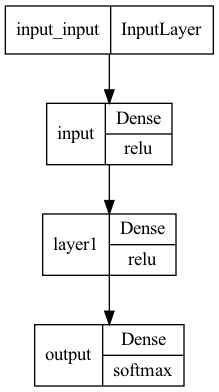

In [19]:
plot_model(model, show_layer_activations=True, to_file='model/model.png')

In [20]:
checkpoint_path = "model/checkpoint.h5"

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_acc',
                             verbose=2
                            )

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [22]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_valid, Y_valid), 
                    epochs=1000, 
                    batch_size=8,
                    callbacks=[checkpoint])

2022-08-23 14:35:56.574987: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-23 14:35:56.700635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/1000
87/91 [===========================>..] - ETA: 0s - loss: 2.6759 - acc: 0.1336
Epoch 00001: val_acc improved from -inf to 0.12821, saving model to model/checkpoint.h5
91/91 [==============================] - 1s 7ms/step - loss: 2.6741 - acc: 0.1291 - val_loss: 2.5301 - val_acc: 0.1282
Epoch 2/1000
 1/91 [..............................] - ETA: 0s - loss: 2.6111 - acc: 0.1250

2022-08-23 14:35:57.264048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


87/91 [===========================>..] - ETA: 0s - loss: 2.4077 - acc: 0.1351
Epoch 00002: val_acc improved from 0.12821 to 0.15705, saving model to model/checkpoint.h5
91/91 [==============================] - 1s 7ms/step - loss: 2.4021 - acc: 0.1346 - val_loss: 2.2850 - val_acc: 0.1571
Epoch 3/1000
85/91 [===========================>..] - ETA: 0s - loss: 2.2088 - acc: 0.1426
Epoch 00003: val_acc improved from 0.15705 to 0.16346, saving model to model/checkpoint.h5
91/91 [==============================] - 1s 7ms/step - loss: 2.1972 - acc: 0.1442 - val_loss: 2.1369 - val_acc: 0.1635
Epoch 4/1000
87/91 [===========================>..] - ETA: 0s - loss: 2.0764 - acc: 0.1739
Epoch 00004: val_acc improved from 0.16346 to 0.20192, saving model to model/checkpoint.h5
91/91 [==============================] - 1s 7ms/step - loss: 2.0756 - acc: 0.1717 - val_loss: 2.0394 - val_acc: 0.2019
Epoch 5/1000
87/91 [===========================>..] - ETA: 0s - loss: 1.9801 - acc: 0.2213
Epoch 00005: val_ac

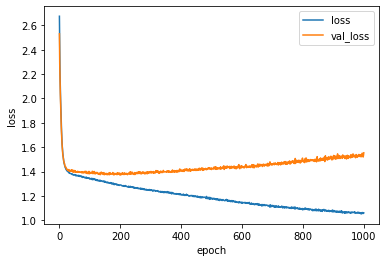

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

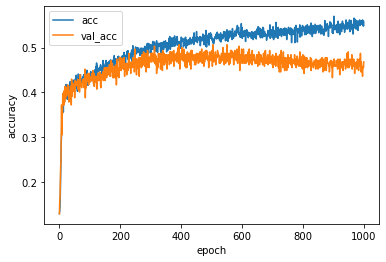

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'])
plt.show()

In [25]:
# weigh save
model.save_weights('weights/prediction_model_weighs.h5')

In [26]:
# save model weights once
model.save('model/prediction_model.h5')